In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv('balancescale.csv')
data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [7]:
#Converting categorial variables into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
    if data[col].dtype=='object':
        if len(list(data[col].unique()))<=25:
            le.fit(data[col])
            data[col]=le.transform(data[col])
            le_count+=1
print('{} columns enocded.', format(le_count))

{} columns enocded. 1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
0    625 non-null int32
1    625 non-null int64
2    625 non-null int64
3    625 non-null int64
4    625 non-null int64
dtypes: int32(1), int64(4)
memory usage: 22.1 KB


In [10]:
data.describe()

,0,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,1.382400,3.000000,3.000000,3.000000,3.000000
std,0.627375,1.415346,1.415346,1.415346,1.415346
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
data.head()

,0,1,2,3,4
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [12]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

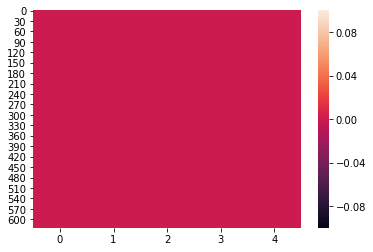

In [13]:
sns.heatmap(data.isnull())

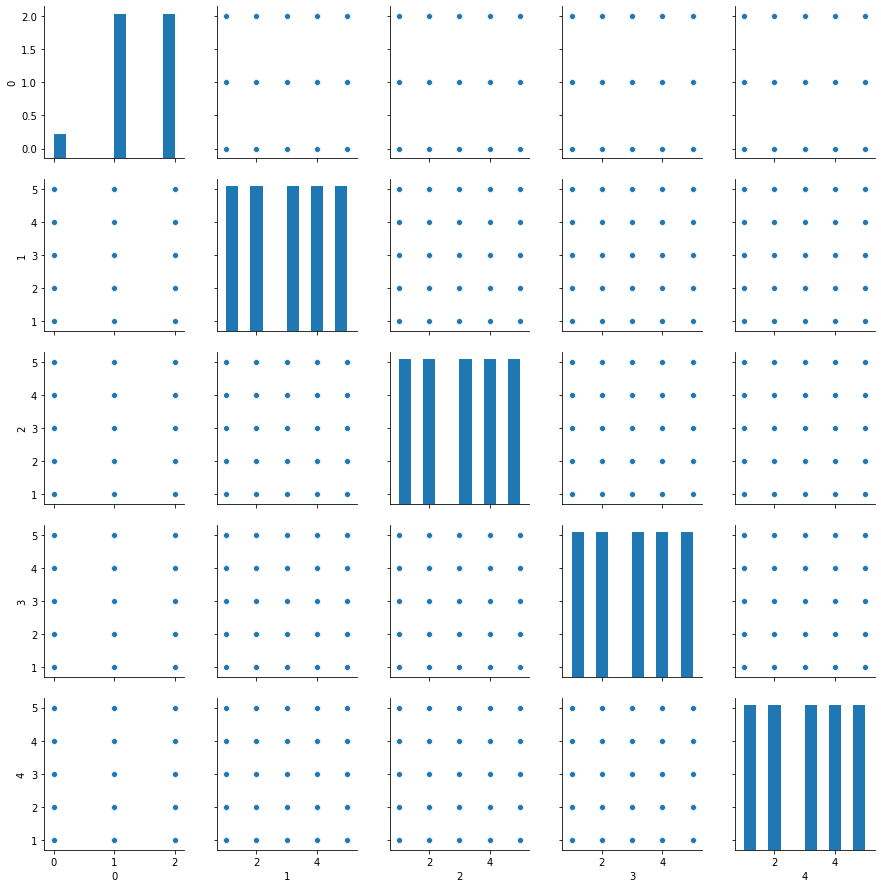

In [15]:
sns.pairplot(data)

In [16]:
data.skew()

0   -0.505934
1    0.000000
2    0.000000
3    0.000000
4    0.000000
dtype: float64

In [17]:
data.shape

(625, 5)

In [18]:
data.corr()

,0,1,2,3,4
0,1.000000,-0.306813,-0.306813,0.323056,0.323056
1,-0.306813,1.000000,0.000000,0.000000,0.000000
2,-0.306813,0.000000,1.000000,0.000000,0.000000
3,0.323056,0.000000,0.000000,1.000000,0.000000
4,0.323056,0.000000,0.000000,0.000000,1.000000


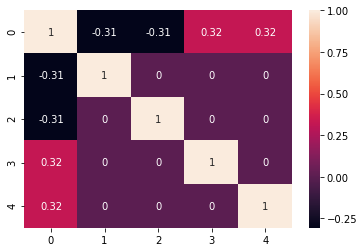

In [19]:
sns.heatmap(data.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFA488A470>,
      dtype=object)

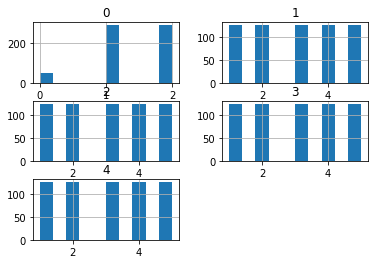

In [20]:
data.hist()

In [22]:
x=data.drop('0',axis=1)
x.head()

,1,2,3,4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [24]:
y=data['0']
y.head()

0    0
1    2
2    2
3    2
4    2
Name: 0, dtype: int32

In [25]:
print(x.shape)
print(y.shape)

(625, 4)
(625,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=5)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(493, 4)
(132, 4)
(493,)
(132,)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [46]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8863636363636364
[[ 0  4  4]
 [ 0 56  4]
 [ 0  3 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.93      0.91        60
           2       0.88      0.95      0.92        64

    accuracy                           0.89       132
   macro avg       0.59      0.63      0.61       132
weighted avg       0.83      0.89      0.86       132



In [47]:
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9696969696969697
[[ 8  0  0]
 [ 2 58  0]
 [ 2  0 62]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.97      0.98        60
           2       1.00      0.97      0.98        64

    accuracy                           0.97       132
   macro avg       0.89      0.98      0.92       132
weighted avg       0.98      0.97      0.97       132



In [48]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9166666666666666
[[ 6  0  2]
 [ 1 56  3]
 [ 3  2 59]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.97      0.93      0.95        60
           2       0.92      0.92      0.92        64

    accuracy                           0.92       132
   macro avg       0.83      0.87      0.85       132
weighted avg       0.92      0.92      0.92       132



In [49]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8863636363636364
[[ 0  3  5]
 [ 1 56  3]
 [ 0  3 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.90      0.93      0.92        60
           2       0.88      0.95      0.92        64

    accuracy                           0.89       132
   macro avg       0.60      0.63      0.61       132
weighted avg       0.84      0.89      0.86       132



In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7954545454545454
[[ 0  5  3]
 [ 7 51  2]
 [ 8  2 54]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.88      0.85      0.86        60
           2       0.92      0.84      0.88        64

    accuracy                           0.80       132
   macro avg       0.60      0.56      0.58       132
weighted avg       0.84      0.80      0.82       132



In [51]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
prednb=nb.predict(x_test)
print(accuracy_score(y_test,prednb))
print(confusion_matrix(y_test,prednb))
print(classification_report(y_test,prednb))

0.8787878787878788
[[ 0  5  3]
 [ 0 57  3]
 [ 0  5 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.85      0.95      0.90        60
           2       0.91      0.92      0.91        64

    accuracy                           0.88       132
   macro avg       0.59      0.62      0.60       132
weighted avg       0.83      0.88      0.85       132



In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8181818181818182
[[ 0  5  3]
 [ 7 50  3]
 [ 4  2 58]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.88      0.83      0.85        60
           2       0.91      0.91      0.91        64

    accuracy                           0.82       132
   macro avg       0.59      0.58      0.59       132
weighted avg       0.84      0.82      0.83       132



In [53]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8106060606060606
[[ 0  7  1]
 [ 6 51  3]
 [ 4  4 56]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.82      0.85      0.84        60
           2       0.93      0.88      0.90        64

    accuracy                           0.81       132
   macro avg       0.59      0.58      0.58       132
weighted avg       0.83      0.81      0.82       132



In [54]:
#Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters=[{"C":[1,10,100,1000],'kernel':['linear']},
            {"C":[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {"C":[1,10,100,1000],'kernel':['poly'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=svc,
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [55]:
accuracy=grid_search.best_score_
accuracy

0.9959432048681541

In [56]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'poly'}

In [58]:
#Saving the Model with Best Accuracy Score
from sklearn.externals import joblib
joblib.dump(svc,"Balance_Scale.pkl")

['Balance_Scale.pkl']